In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('data/meu_dataset.csv')
x = df.cases.values
y = df.deaths.values

# Tarefa 1: Aprendizado Supervisionado

Autor: Nasser Santiago Boan

## 1) Tarefa: implementar a função “fit_linear_regression(pontos)”. Retorne os valores de m e de a.

### Variáveis:

> pontos: conjunto de pontos 2D (casos x mortes) que serão clusterizados

>Desafio: pesquise sobre como realizar regressão linear para casos com 3 dimensões (2 features e 1 target) e implemente a função fit_linear_regression_3D(pontos).


O seu relatório será o notebook exportado para um arquivo HTML e deve conter:

> Um scatter plot mostrando os pontos e a linha estimada na regressão.<br>Calcule o R2 e discorra sobre o quão boa foi a sua aproximação, sugerindo possíveis formas de melhorar o seu modelo.<br>Compare os seus resultados com os obtidos através do sklearn.linear_model.LinearRegression. Eles deveriam ser iguais.

In [24]:
class LinReg():
    def __init__(self,x,y):
        self.x = x
        self.y = y
        self.x_mean = np.mean(x)
        self.y_mean = np.mean(y)
        self.n = len(x)
        
        
    def fit_lin_reg(self):
        
        numerator = 0
        denominator = 0
                
        for i in range(self.n):
            numerator += (self.x[i] - self.x_mean) * (self.y[i] - self.y_mean)
            denominator += (self.x[i] - self.x_mean)**2
        
        self.coef = numerator/denominator
        self.intercept = self.y_mean - (self.coef * self.x_mean)
    
    def plot(self):
        x_max = np.max(self.x)*1,1
        x_min = np.min(self.x)*1,1

        plt_x = np.linspace(x_min,x_max,10000)
        plt_y = self.intercept + self.coef * plt_x

        plt.figure(figsize=(15,6))
        plt.scatter(x = self.x, y = self.y, label = 'Original data');
        plt.plot(plt_x, plt_y, color = 'red',label = 'Linear Regression');
        plt.legend()
        plt.show()
        
    def metrics(self):
        
        self.rmse = 0
        
        for i in range(self.n):
            pred = self.intercept + (self.coef * self.x[i])
            self.rmse += (self.y[i] - pred)**2
            
        self.rmse = np.sqrt(self.rmse/self.n)
        
        self.sumofsquares = 0
        self.sumofresiduals = 0
        self.r2score = 0 
        
        for i in range(self.n) :
            pred = self.intercept + (self.coef * self.x[i])
            self.sumofsquares += (self.y[i] - self.y_mean) ** 2
            self.sumofresiduals += (self.y[i] - pred) **2

        self.r2score  = 1 - (self.sumofresiduals/self.sumofsquares)
        
        print(F'METRICS FOR INTERCEPT : {self.intercept} COEF : {self.coef}\n\nrmse   :{self.rmse}\nr2     :{self.r2score}')

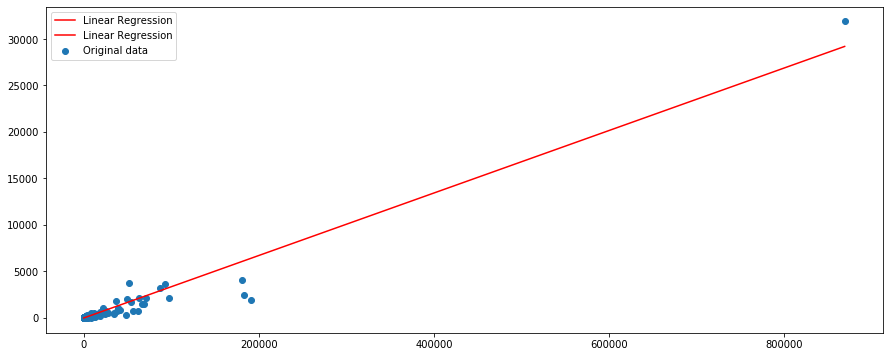

METRICS FOR INTERCEPT : -18.630122622505695 COEF : 0.03363158183436369

rmse   :198.48611614013106
r2     :0.9444904768158011


In [25]:
model = LinReg(x,y)
model.fit_lin_reg()
model.plot()
model.metrics()

## Comparando com sklearn

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [29]:
lr = LinearRegression()
lr.fit(x.reshape(-1,1),y)
y_pred = lr.predict(x.reshape(-1,1))

print(F'METRICS FOR INTERCEPT : {lr.intercept_} COEF : {lr.coef_[0]}\n\nrmse   :{np.sqrt(mean_squared_error(y_pred,y))}\nr2     :{r2_score(y_pred,y)}')

METRICS FOR INTERCEPT : -18.630122622505525 COEF : 0.03363158183436363

rmse   :198.48611614013106
r2     :0.9412280752990321
